# Exploratory Analysis of Water Quality Data I - Continuous Data (by stations)

# Temporal Patterns

This document includes Python code and results of the exploratory analysis of water quality data in the SEACAR Pilot project.

In [2]:
import matplotlib.pyplot as plt
import numpy      as np
import pandas     as pd
import geopandas  as gpd
import contextily as cx
import seaborn as sns
import warnings
import matplotlib
import math
import misc

warnings.filterwarnings('ignore')
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

## 1. Data loading and preprocessing
Read the csv file of data.

In [3]:
# load shapefile of managed areas
areaShp = gpd.read_file("../GIS_data/ORCP_Managed_Areas_Oct2021.shp")
# Load and preprocess the WQ data
df2, listPara, listArea, listValue, dictUnits, dictMonth, dictArea = misc.load_data('../OEAT_Continuous-2022-Nov-04.csv')

AttributeError: module 'misc' has no attribute 'load_data'

## 2. Exploratory Analysis
Calculate each parameters' Count, Max, Min, Mean, and STD of each areas in weekly, monthly, quarterly and yearly intervals.

In [33]:
weekly_count     = df2.groupby(["ParameterName","ManagedAreaName","ProgramLocationID",pd.Grouper(key="timestamp",freq="W")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
monthly_count    = df2.groupby(["ParameterName","ManagedAreaName","ProgramLocationID",pd.Grouper(key="timestamp",freq="M")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
quarterly_count  = df2.groupby(["ParameterName","ManagedAreaName","ProgramLocationID",pd.Grouper(key="timestamp",freq="Q")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()
yearly_count     = df2.groupby(["ParameterName","ManagedAreaName","ProgramLocationID",pd.Grouper(key="timestamp",freq="Y")])[
    "ResultValue"].agg(["count","max","min","mean","std"]).sort_values("timestamp").reset_index()

Process geospatial data

In [34]:
dfLoc  = df2.groupby(['Latitude_DD','Longitude_DD',"ParameterName","ManagedAreaName","ProgramLocationID"])["ResultValue"].agg("count").reset_index()

dfLoc = dfLoc.rename(columns={"ResultValue": "samples"})

dfLoc.loc[dfLoc["samples"] == 1,['sample_type']] ='Random Point'
dfLoc.loc[dfLoc["samples"] > 1,['sample_type']] ='Fixed Point'

# Group data by location, parametername and managed area name
gdfLoc = gpd.GeoDataFrame(dfLoc, geometry = gpd.points_from_xy(dfLoc.Longitude_DD, dfLoc.Latitude_DD), crs="EPSG:4326").to_crs("EPSG:32617")

dfID  = pd.DataFrame(df2.groupby(["ProgramLocationID","Longitude_DD","Latitude_DD","ManagedAreaName"]).sum().reset_index())
dfID  = dfID[["ProgramLocationID","Longitude_DD","Latitude_DD","ManagedAreaName"]]
gdfID = gpd.GeoDataFrame(dfID, geometry = gpd.points_from_xy(dfID.Longitude_DD, dfID.Latitude_DD), crs="EPSG:4326").to_crs("EPSG:32617")

### 2.1 Monthly Count

Create line charts for sample **counts** in monthly intervals. These line charts shows sampling activity in different time periods.

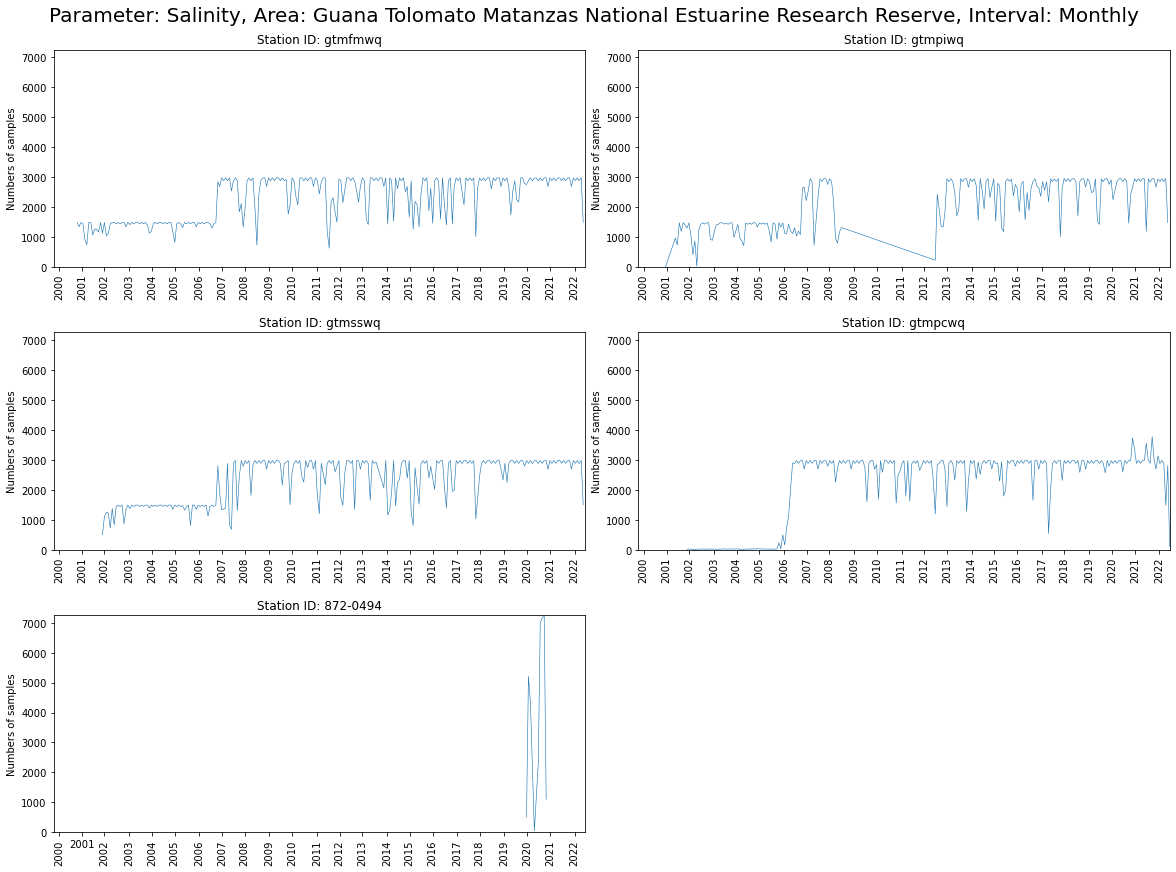

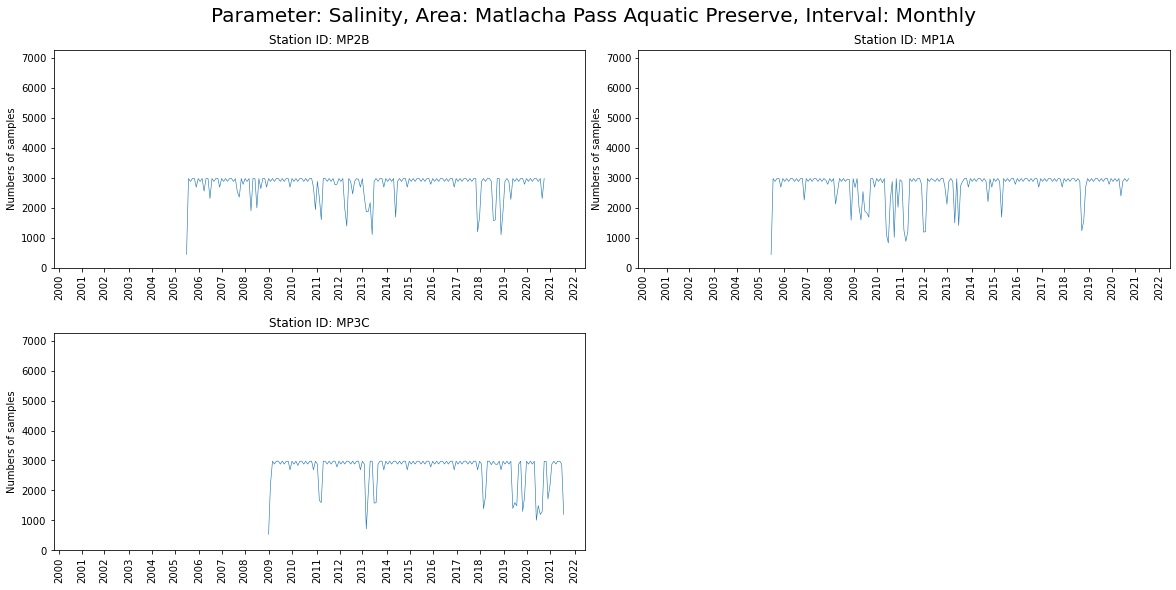

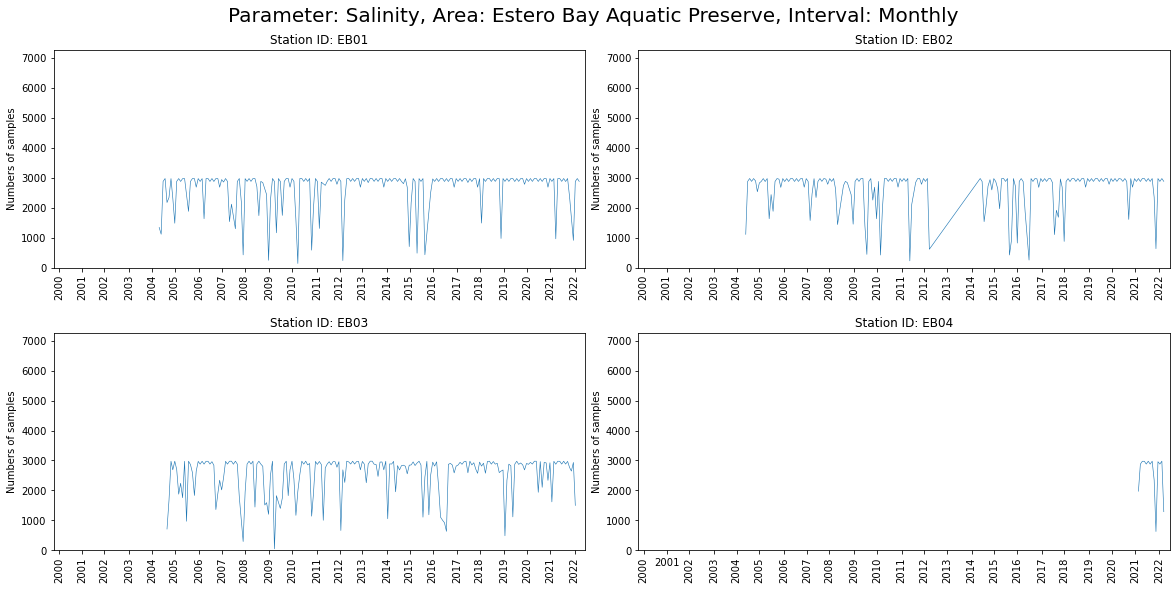

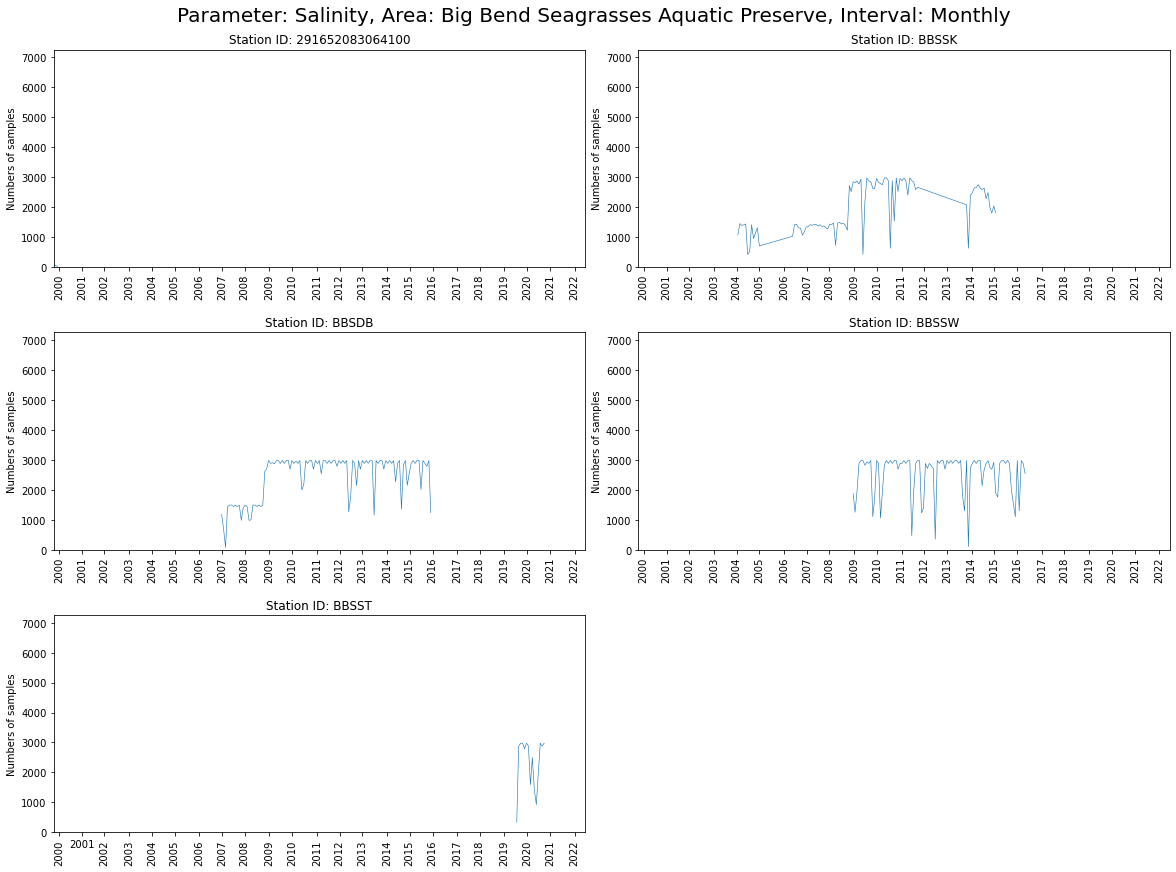

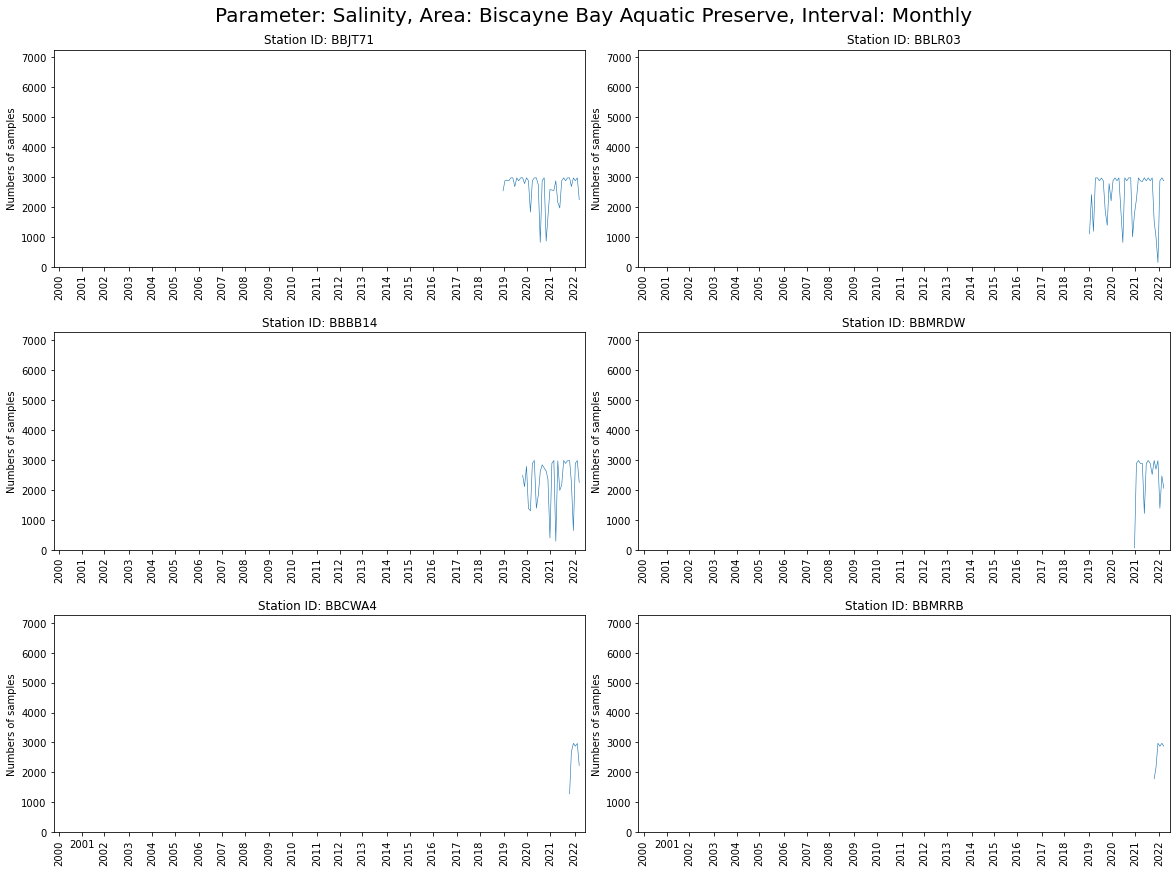

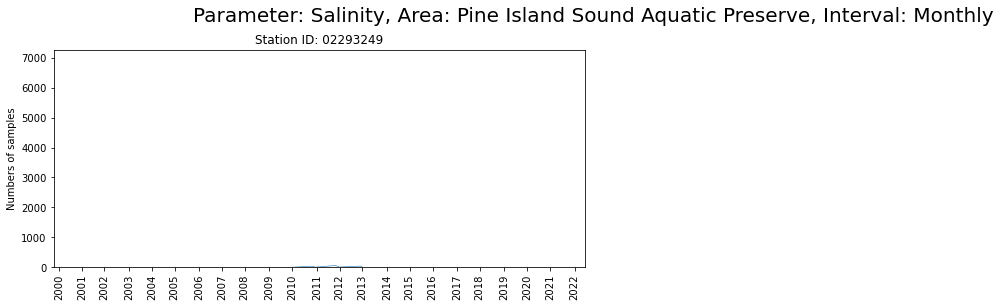

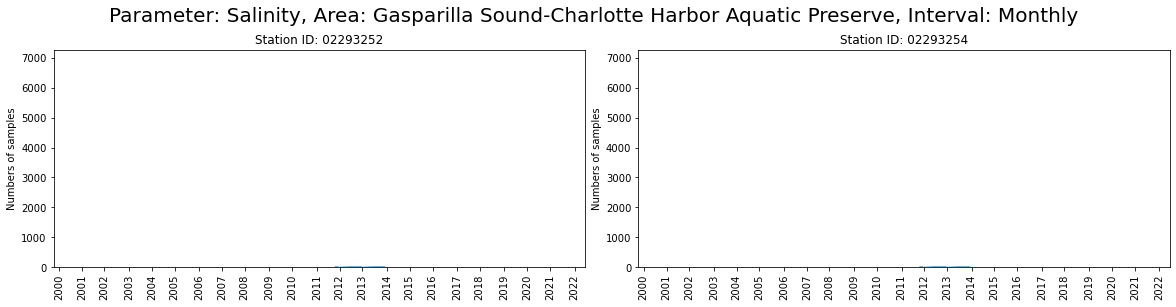

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

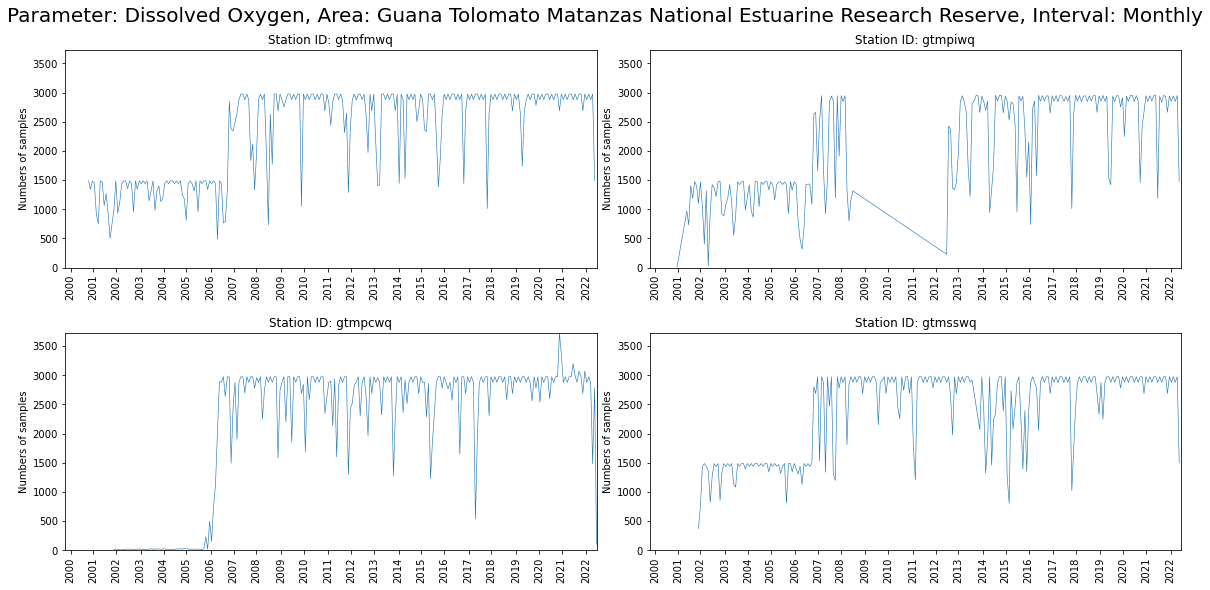

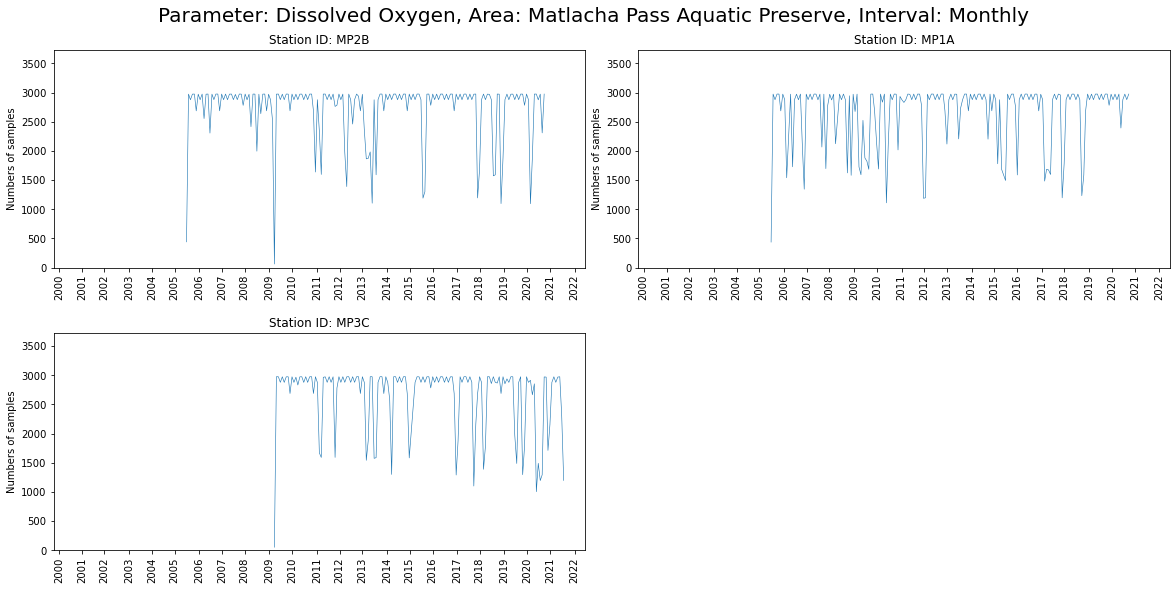

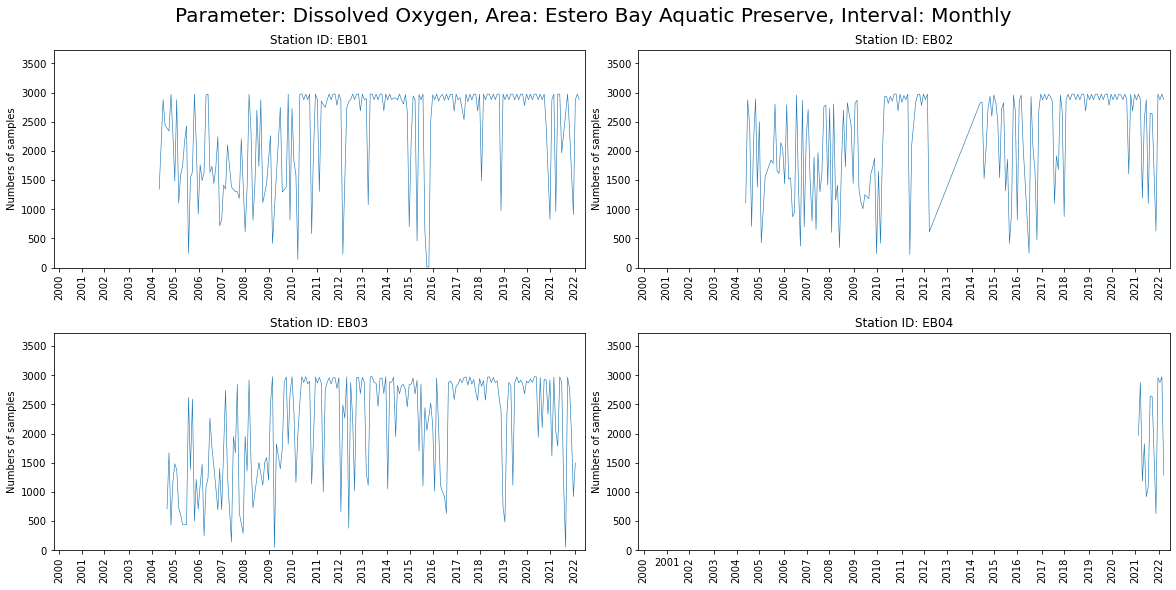

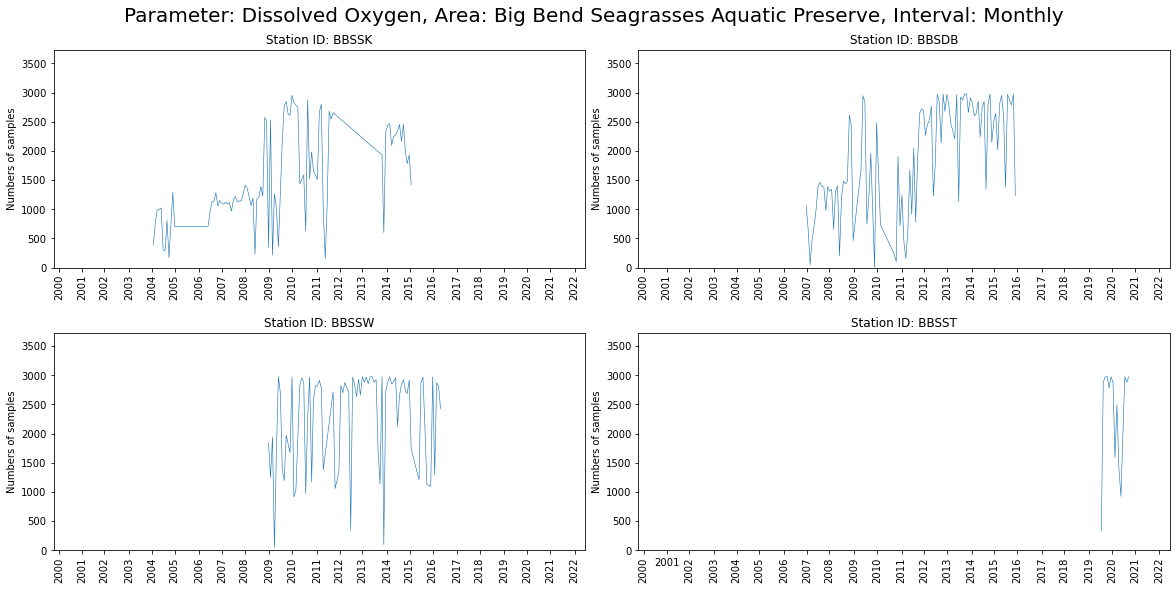

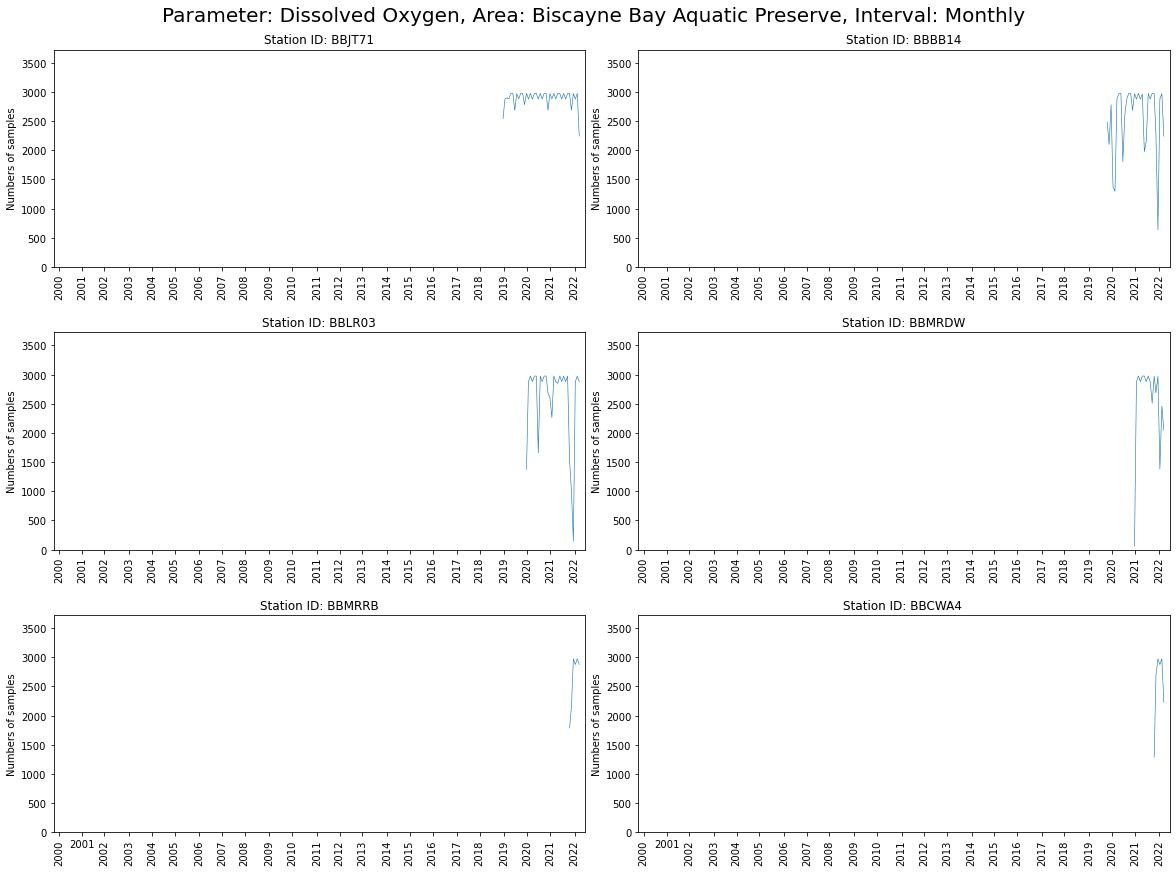

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

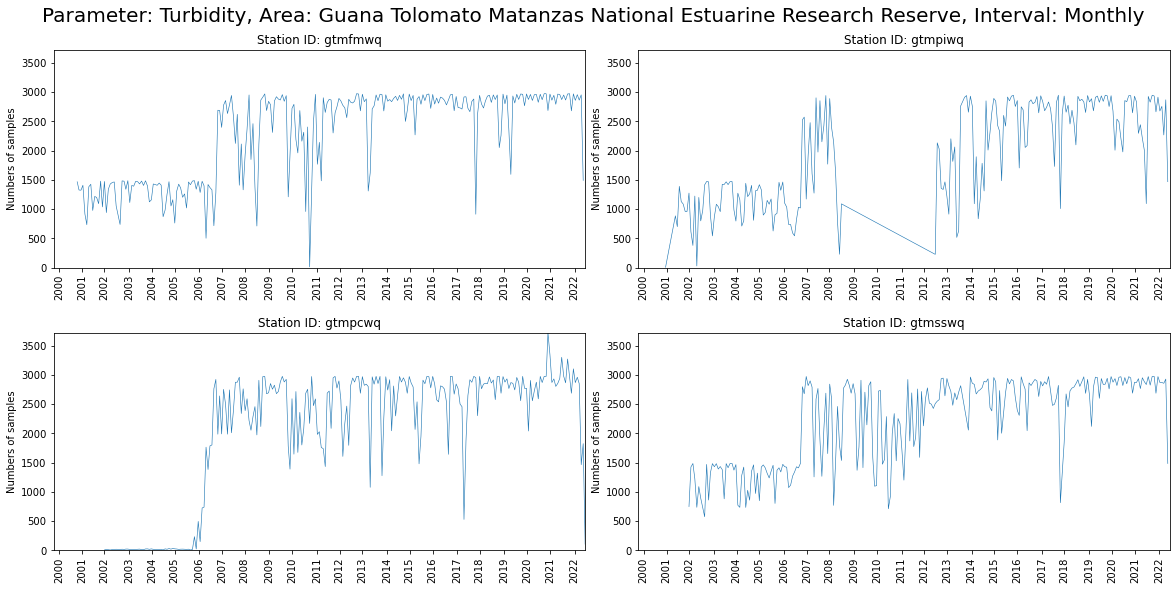

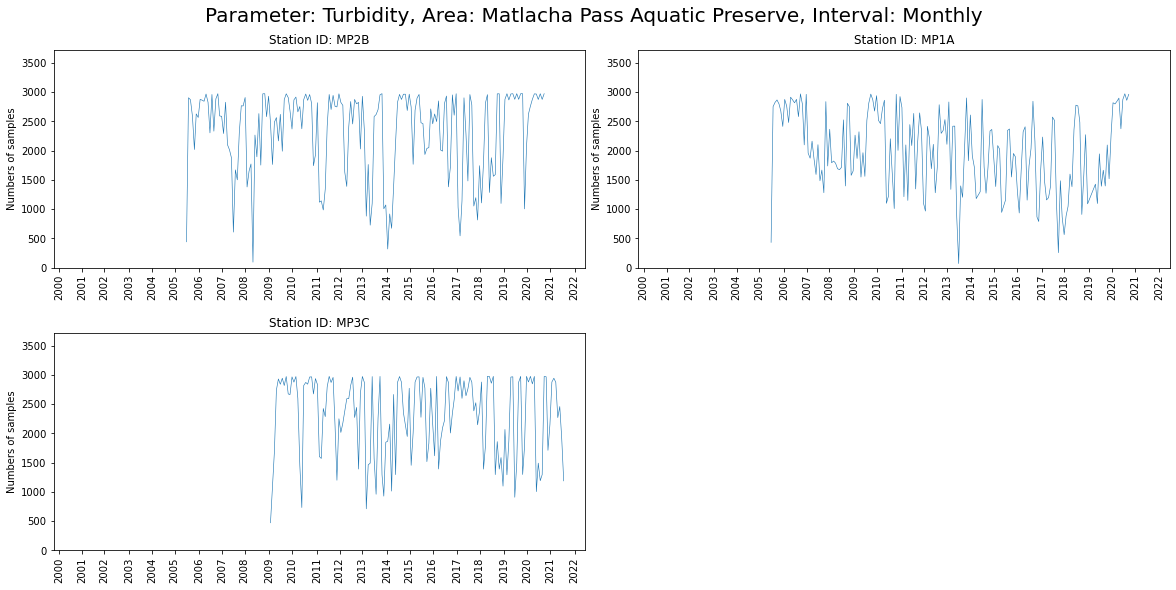

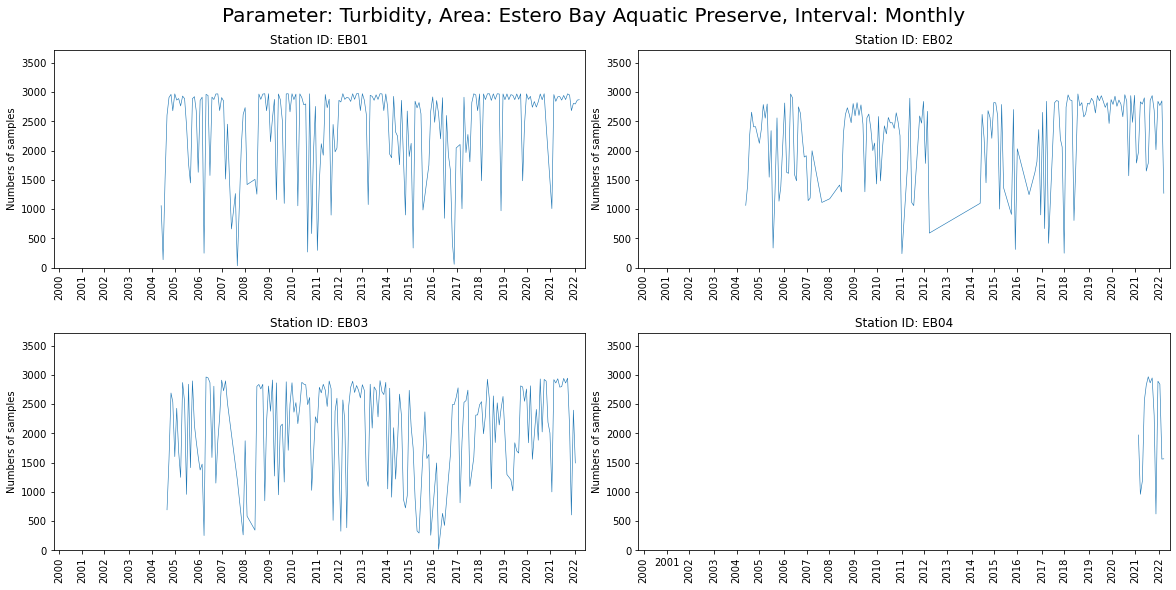

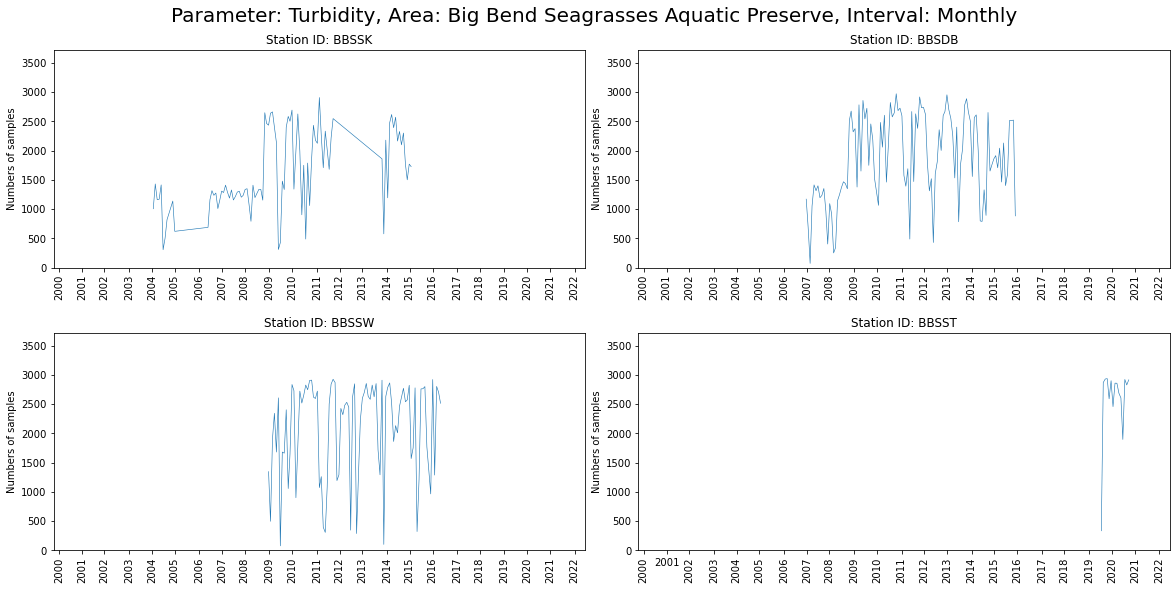

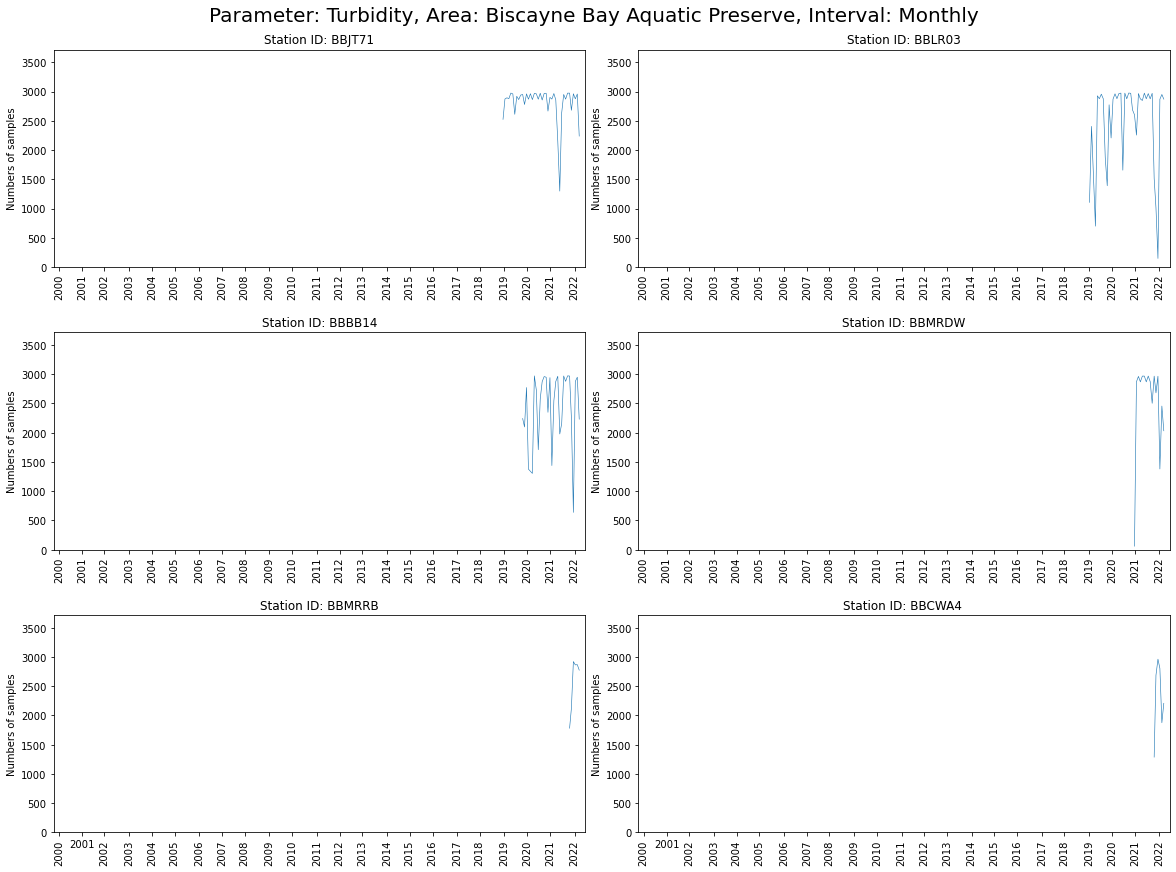

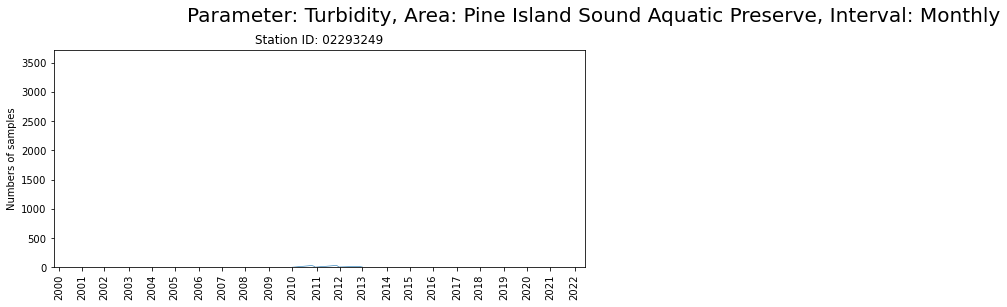

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

In [35]:
plt.rcParams['figure.figsize'] = [20, 30]
value = listValue[0]
rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)
for para in listPara:
    for i in range(len(listArea)):
        fig = plt.figure()
        plt.suptitle("Parameter: " + para + ", "+"Area: "+ str(listArea[i])+", Interval: Monthly", fontsize = 20, y = 0.90)
        dfNew = monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        setList = dfNew.ProgramLocationID.unique()
        up_lim = monthly_count[(monthly_count["ParameterName"] == para)]['count'].max()
        for each in range(len(setList)):
            dfEachValue = dfNew[dfNew["ProgramLocationID"]==setList[each]]
            if dfEachValue["ParameterName"].count() != 0:
                ax = fig.add_subplot(6,2,each+1)
                ax.set_title("Station ID: "+str(setList[each]))
                ax.plot(dfEachValue["timestamp"],dfEachValue[str(value)],linewidth=0.6)
                ax.xaxis.set_major_locator(loc)
                plt.xticks(rotation=90)
                ax.set_xlim([monthly_count["timestamp"].min(),monthly_count["timestamp"].max()])
                ax.set_ylim([0,up_lim])
                plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1,hspace=0.3)
                plt.ylabel("Numbers of samples")

### 2.2 Monthly Means (stations combined)

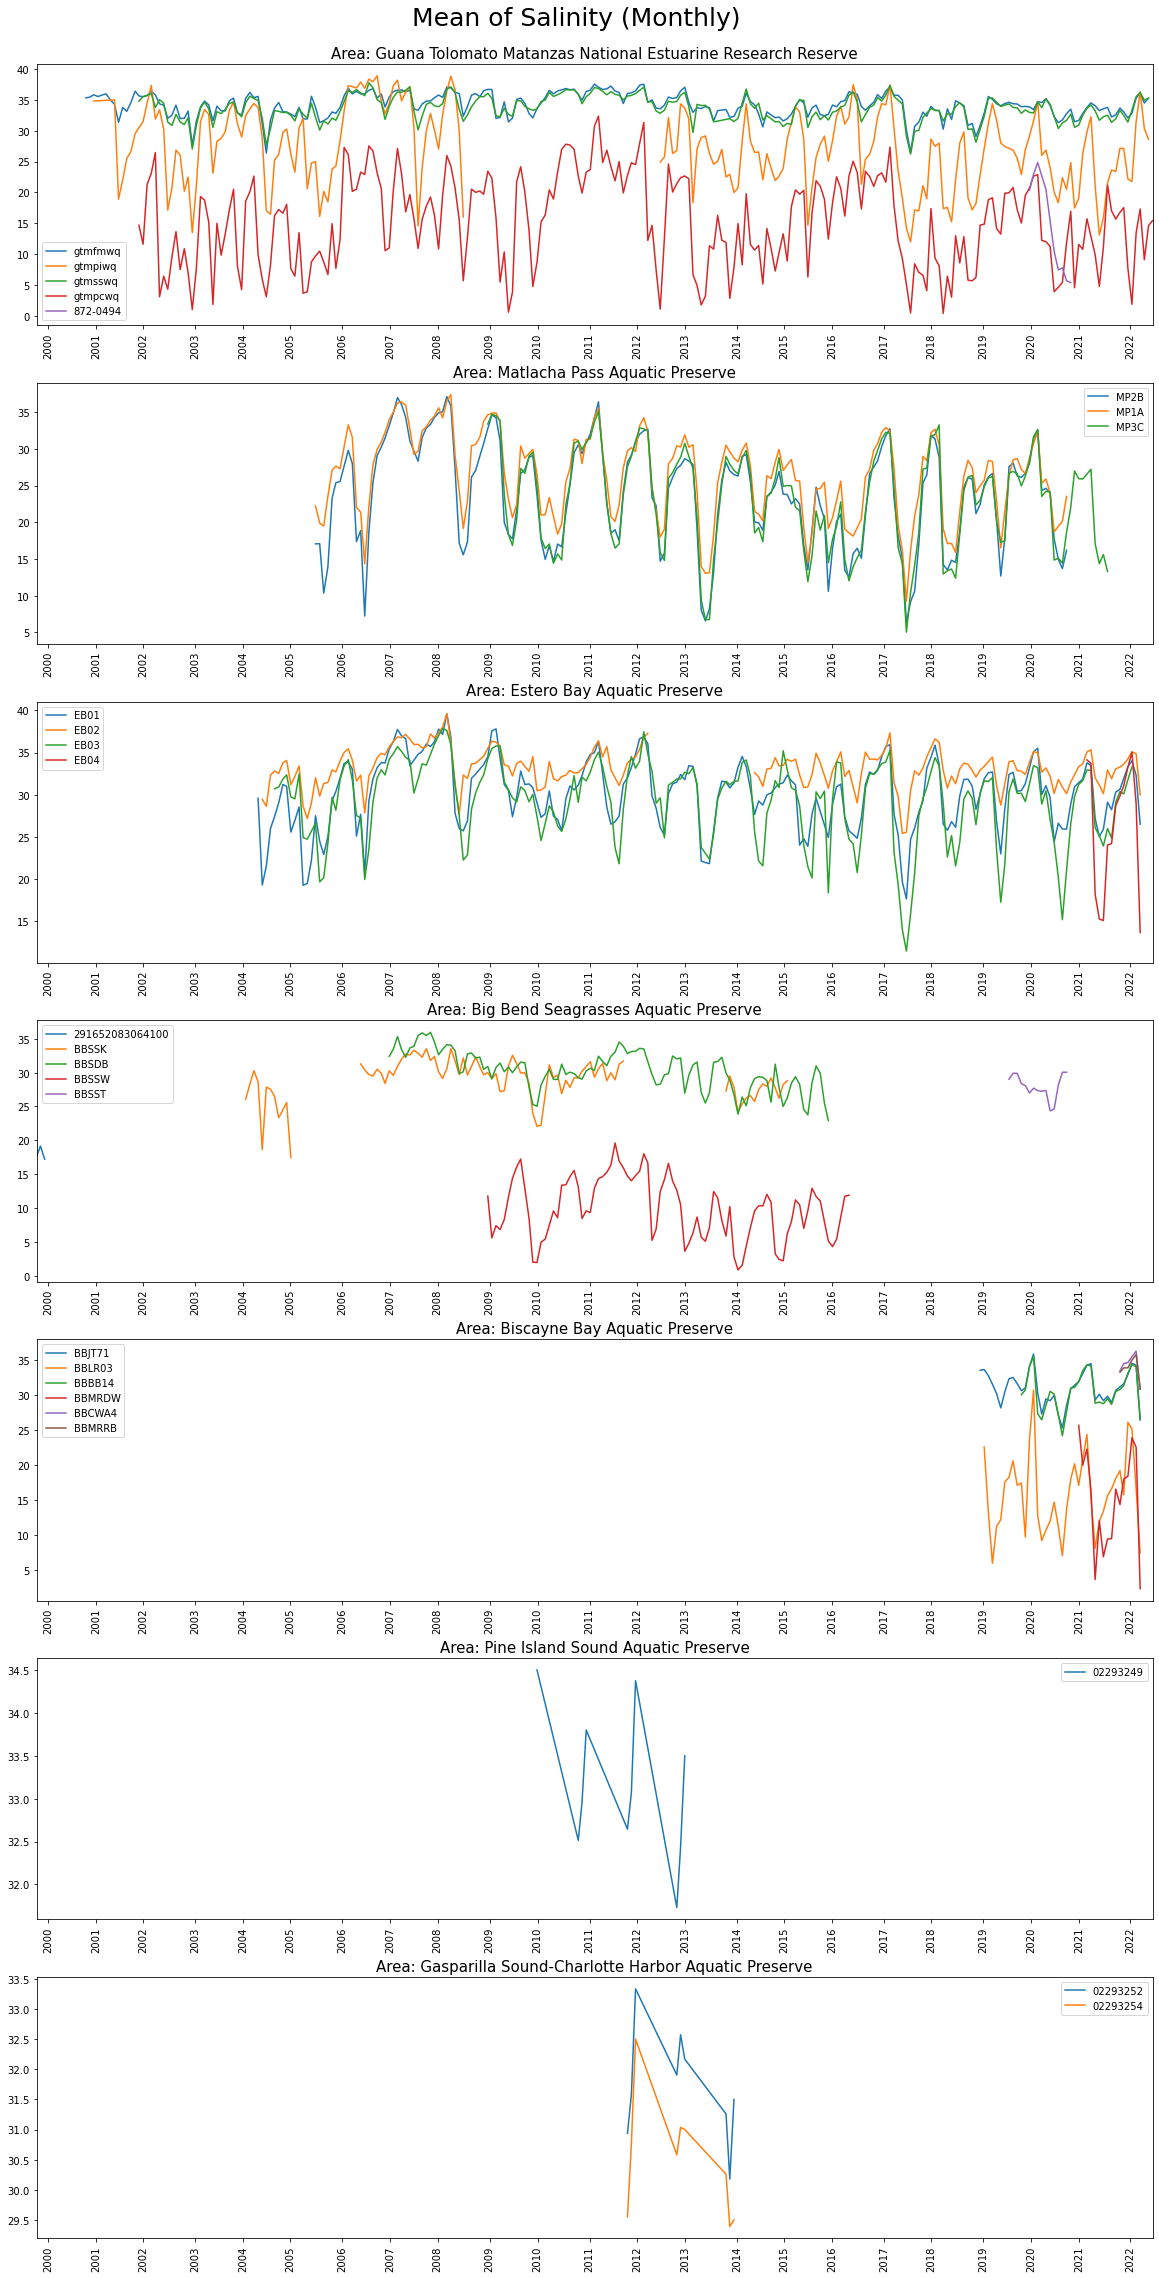

<Figure size 1440x2880 with 0 Axes>

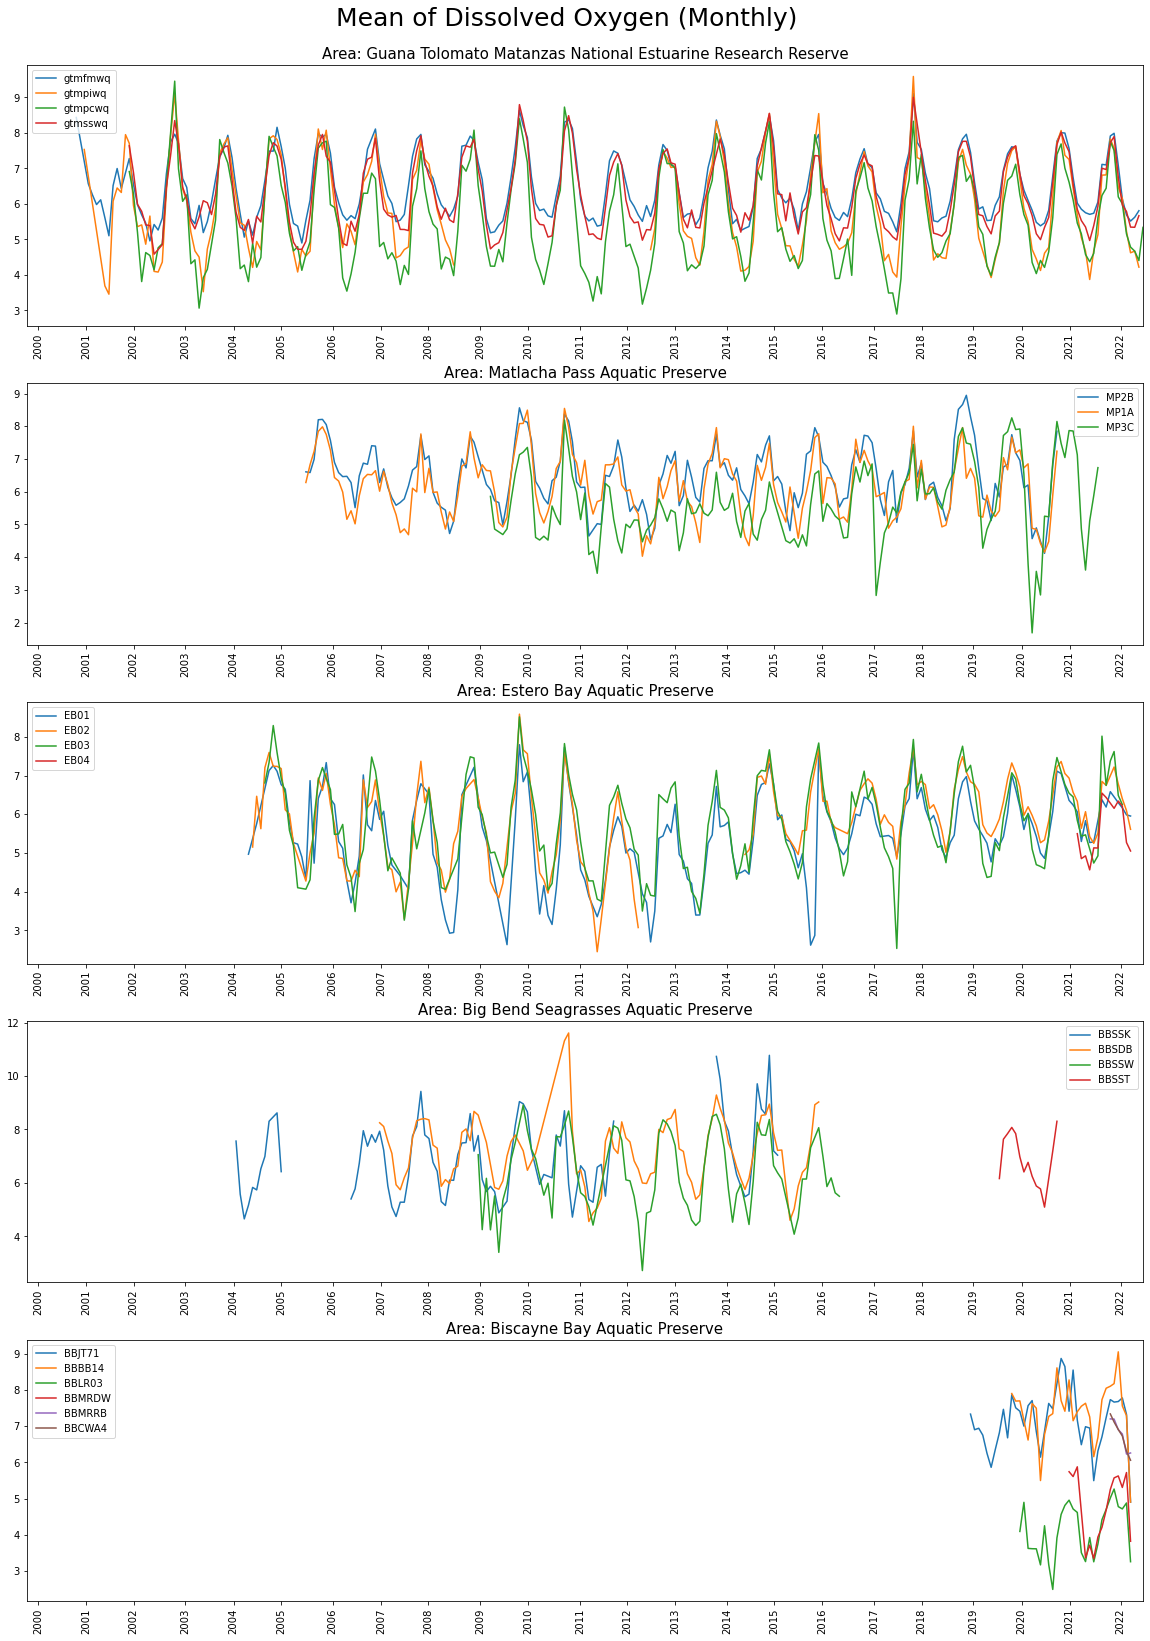

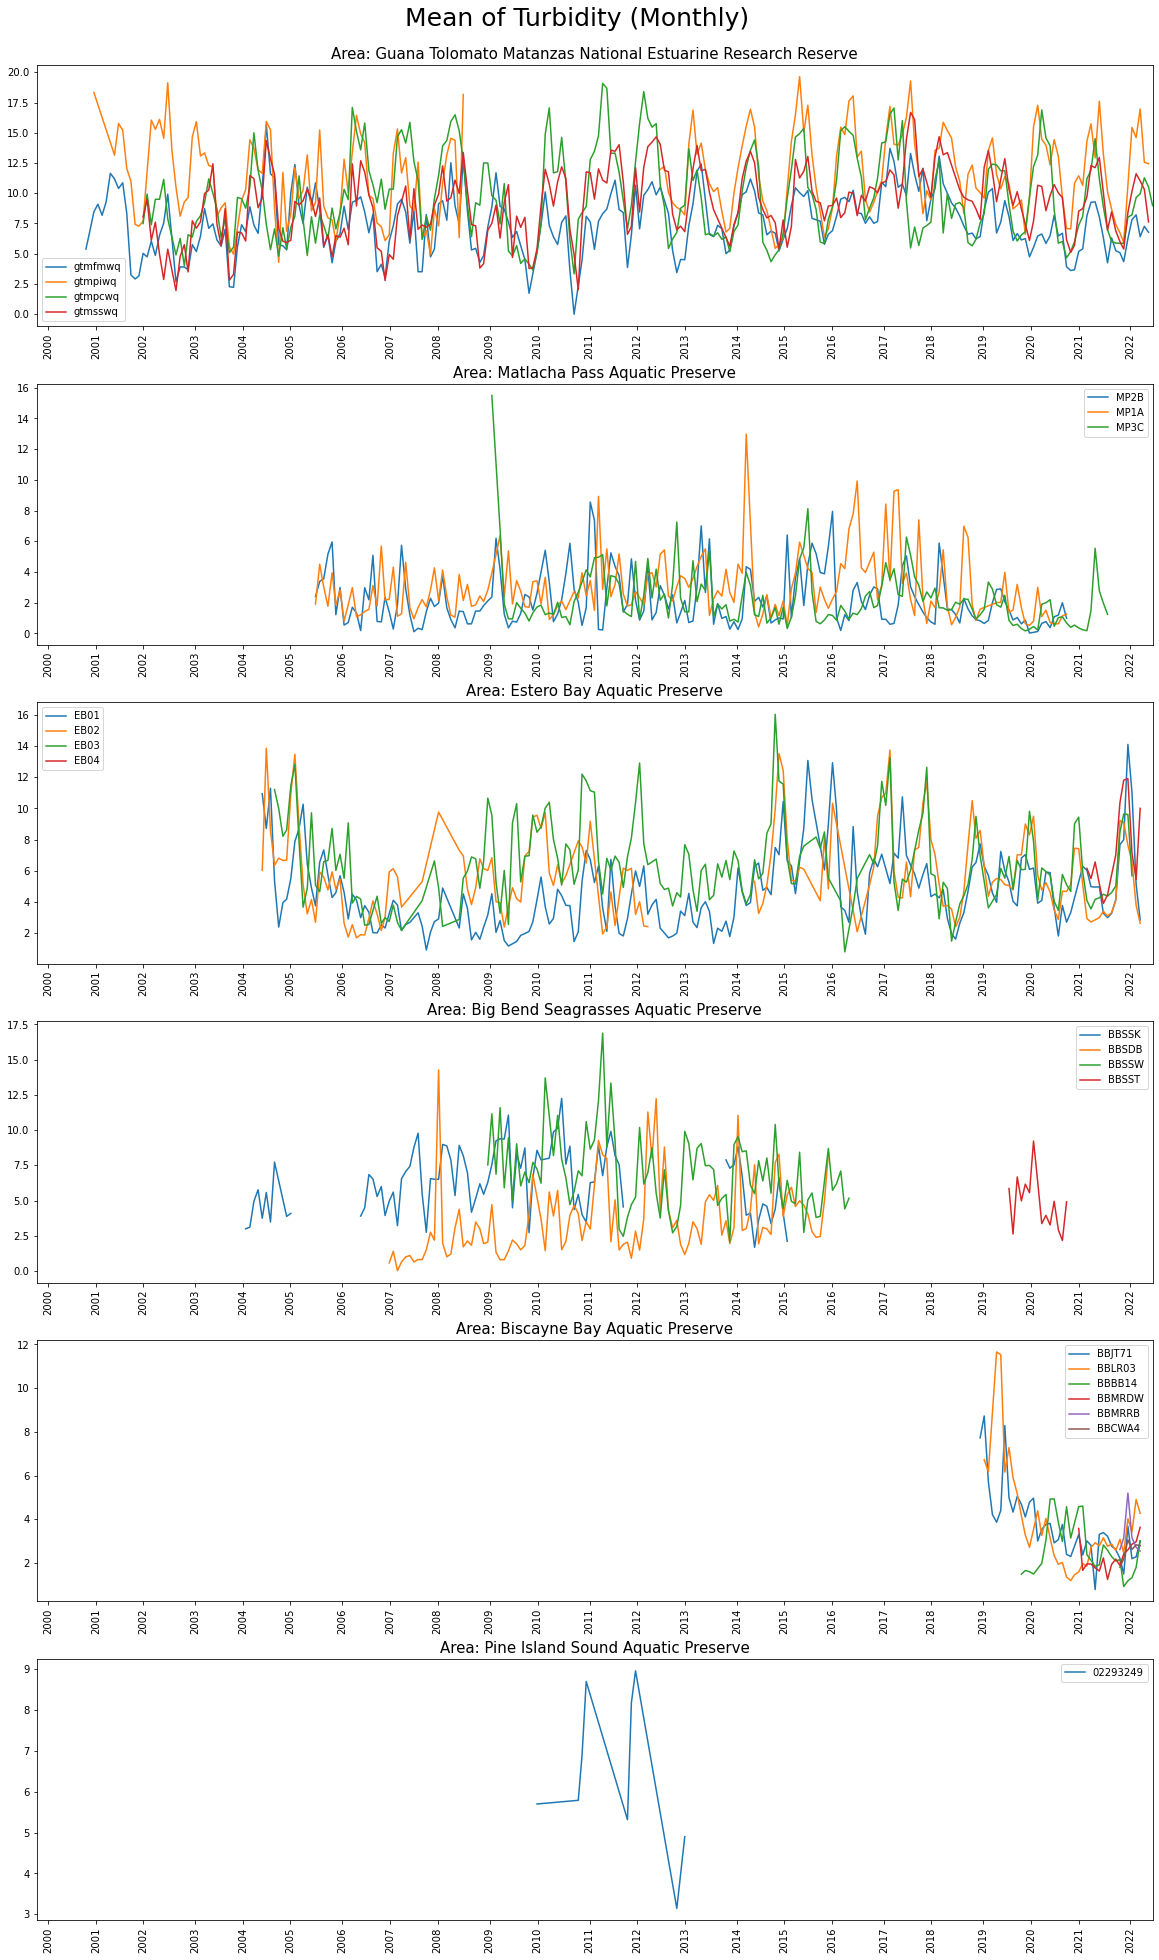

<Figure size 1440x2880 with 0 Axes>

In [36]:
from datetime import datetime
plt.rcParams['figure.figsize'] = [20, 40]
value = listValue[1]
r, c = len(listArea),1

rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)
for para in listPara:
    fig = plt.figure()
    plt.suptitle("Mean of {} (Monthly)".format(para), fontsize = 25, y = 0.9)
    j = 0
    for i in range(len(listArea)):
        dfNew= monthly_count[(monthly_count["ParameterName"] == para)&(monthly_count["ManagedAreaName"]== listArea[i])]
        setList = dfNew.ProgramLocationID.unique()
        if len(setList) !=0:
            ax = fig.add_subplot(r,c,j+1)
            ax.set_title('Area: '+ str(listArea[i]), size=15)
            for each in range(len(setList)):
                dfEachValue = dfNew[dfNew["ProgramLocationID"]==setList[each]]
                gap_idx = np.where(np.diff(dfEachValue.timestamp.values.astype(float)/(1000000000*3600*24*365)) > 1)[0]
                dfEachValue = pd.DataFrame(
                    columns = dfEachValue.columns, 
                    data = np.insert(dfEachValue.values, gap_idx+1, values=np.nan, axis=0)
                    )
                ax.plot(dfEachValue["timestamp"],dfEachValue[str(value)],label=setList[each])
                ax.legend(loc='best')
                ax.xaxis.set_major_locator(loc)
                plt.xticks(rotation=90)
                ax.set_xlim([monthly_count['timestamp'].min(),monthly_count["timestamp"].max()])
                plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.22)
            j = j+1
            
        # Save figure
        plt.savefig(fig_path+"Monthly_mean_{}".format(para))

### 2.4 Yearly Trend (stations combined)

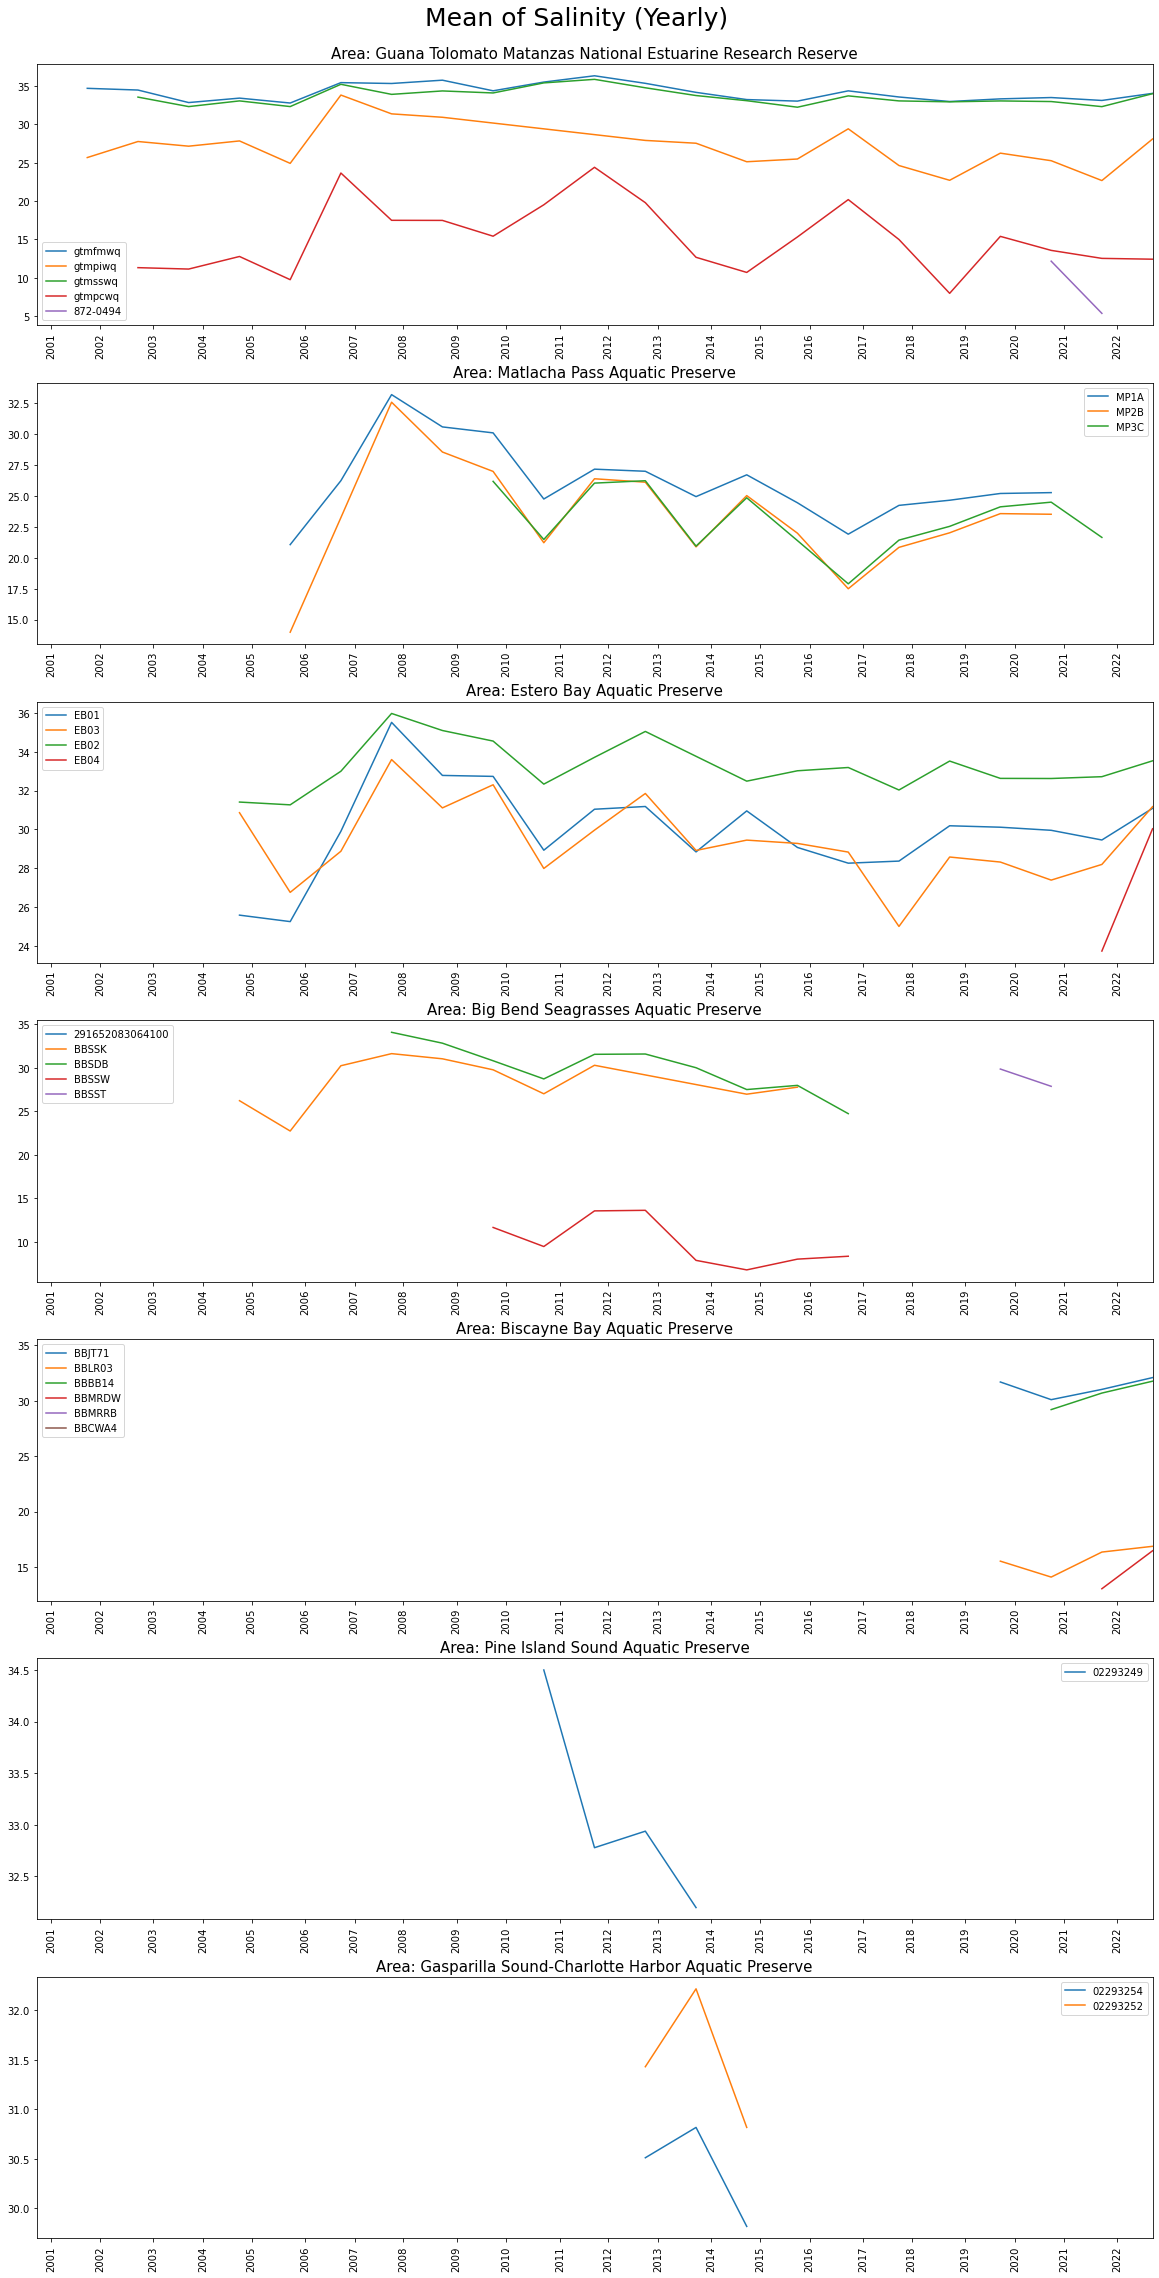

<Figure size 1440x2880 with 0 Axes>

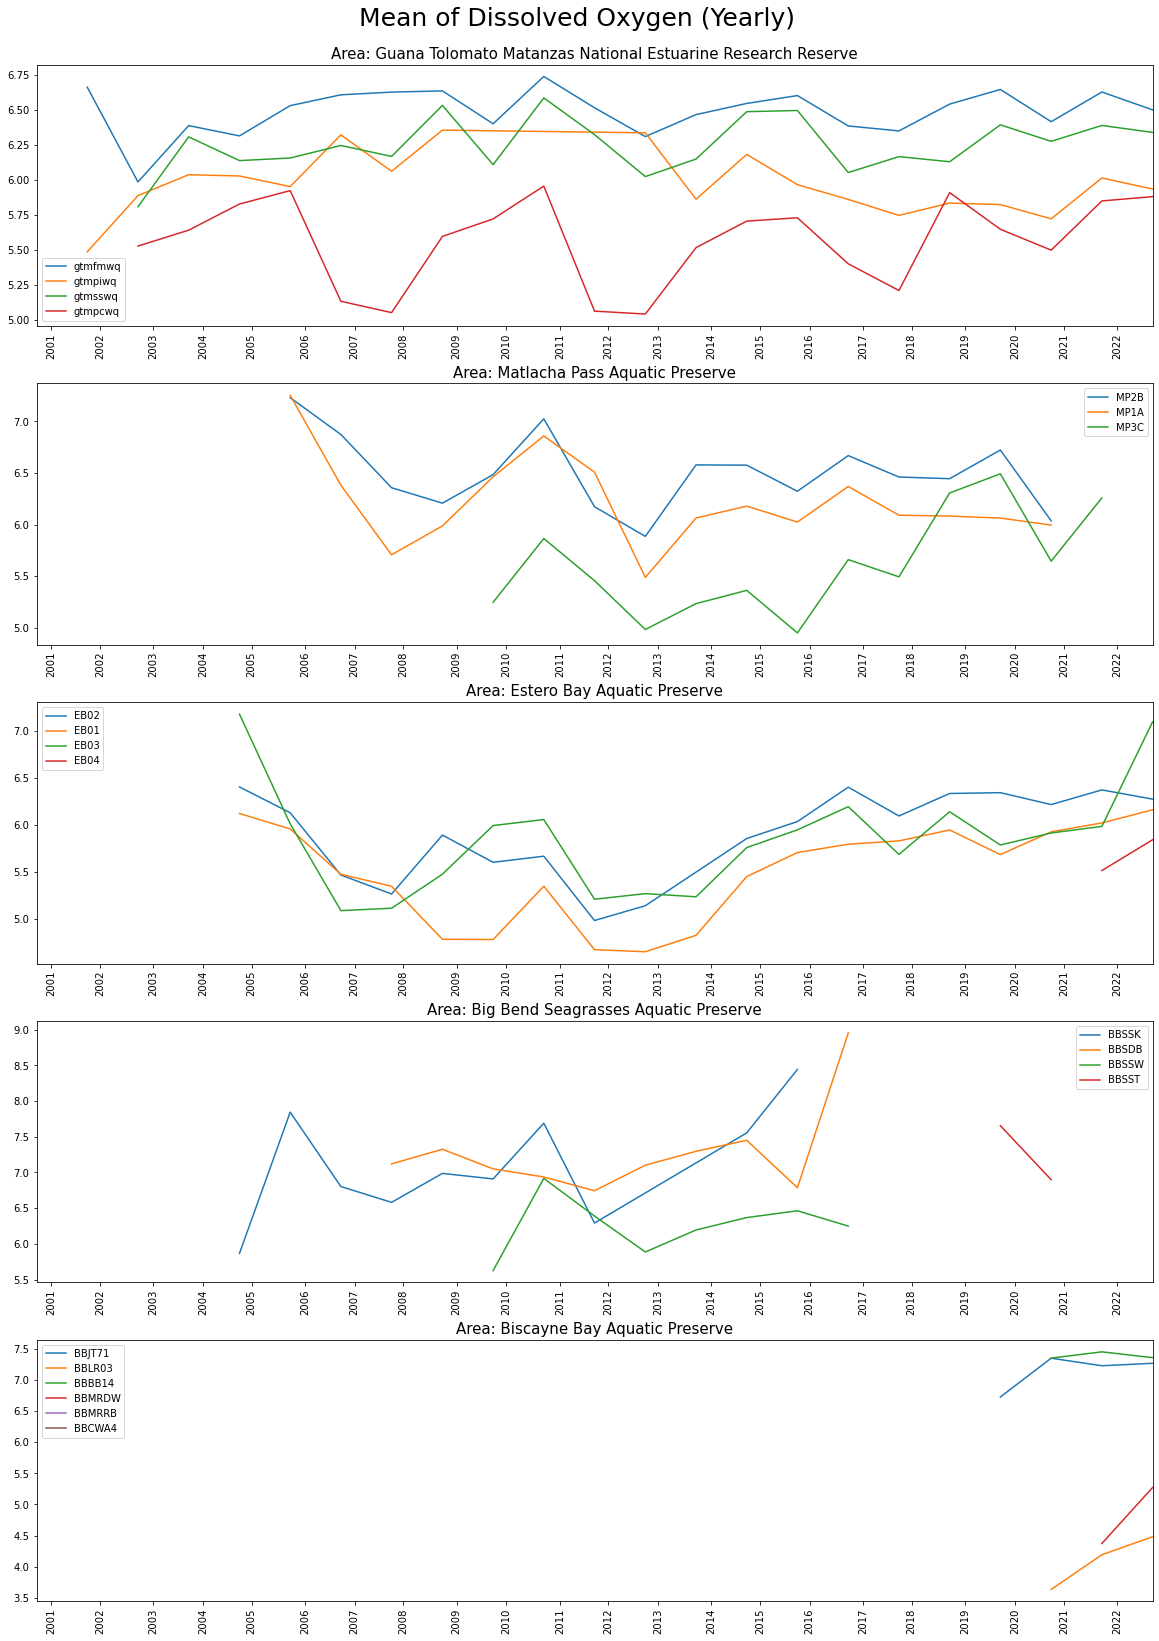

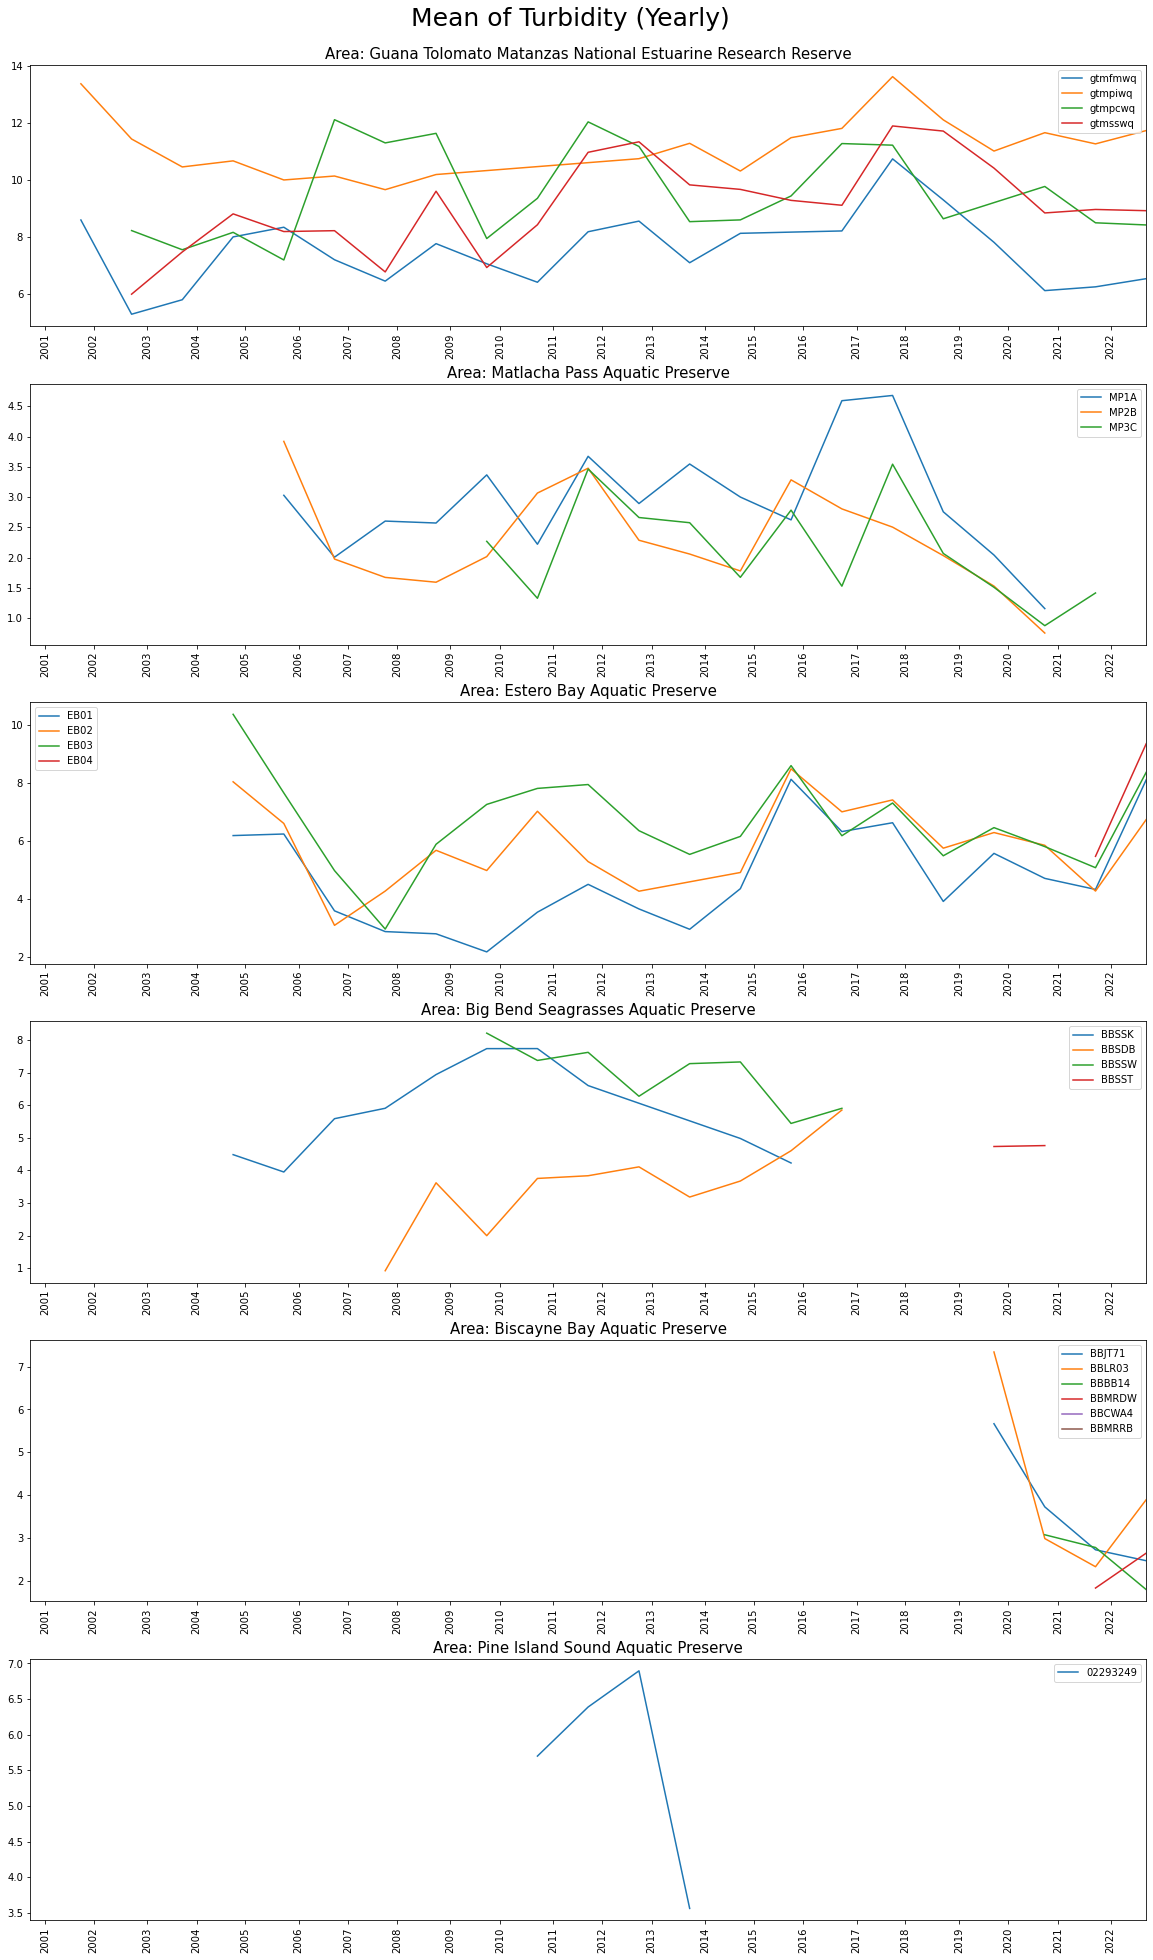

<Figure size 1440x2880 with 0 Axes>

In [37]:
plt.rcParams['figure.figsize'] = [20, 40]
value = listValue[1]
r, c = len(listArea),1

rule  = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc   = RRuleLocator(rule)
for para in listPara:
    fig = plt.figure()
    plt.suptitle("Mean of {} (Yearly)".format(para), fontsize = 25, y = 0.9)
    stats = yearly_count[(yearly_count["ParameterName"] == para)]
    up_lim = stats['mean']
    j = 0
    for i in range(len(listArea)):
        dfNew= yearly_count[(yearly_count["ParameterName"] == para)&(yearly_count["ManagedAreaName"]== listArea[i])]
        setList = dfNew.ProgramLocationID.unique()
        if len(setList) !=0:
            ax = fig.add_subplot(r,c,j+1)
            ax.set_title('Area: '+ str(listArea[i]), size=15)
            for each in range(len(setList)):
                dfEachValue = dfNew[dfNew["ProgramLocationID"]==setList[each]]
                ax.plot(dfEachValue["timestamp"],dfEachValue[str(value)],label=setList[each])
                ax.legend(loc='best')
                ax.xaxis.set_major_locator(loc)
                plt.xticks(rotation=90)
                ax.set_xlim([yearly_count['timestamp'].min(),yearly_count["timestamp"].max()])
                plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.22)

            j = j+1

### 2.5 Statistics by Months (separate stations)

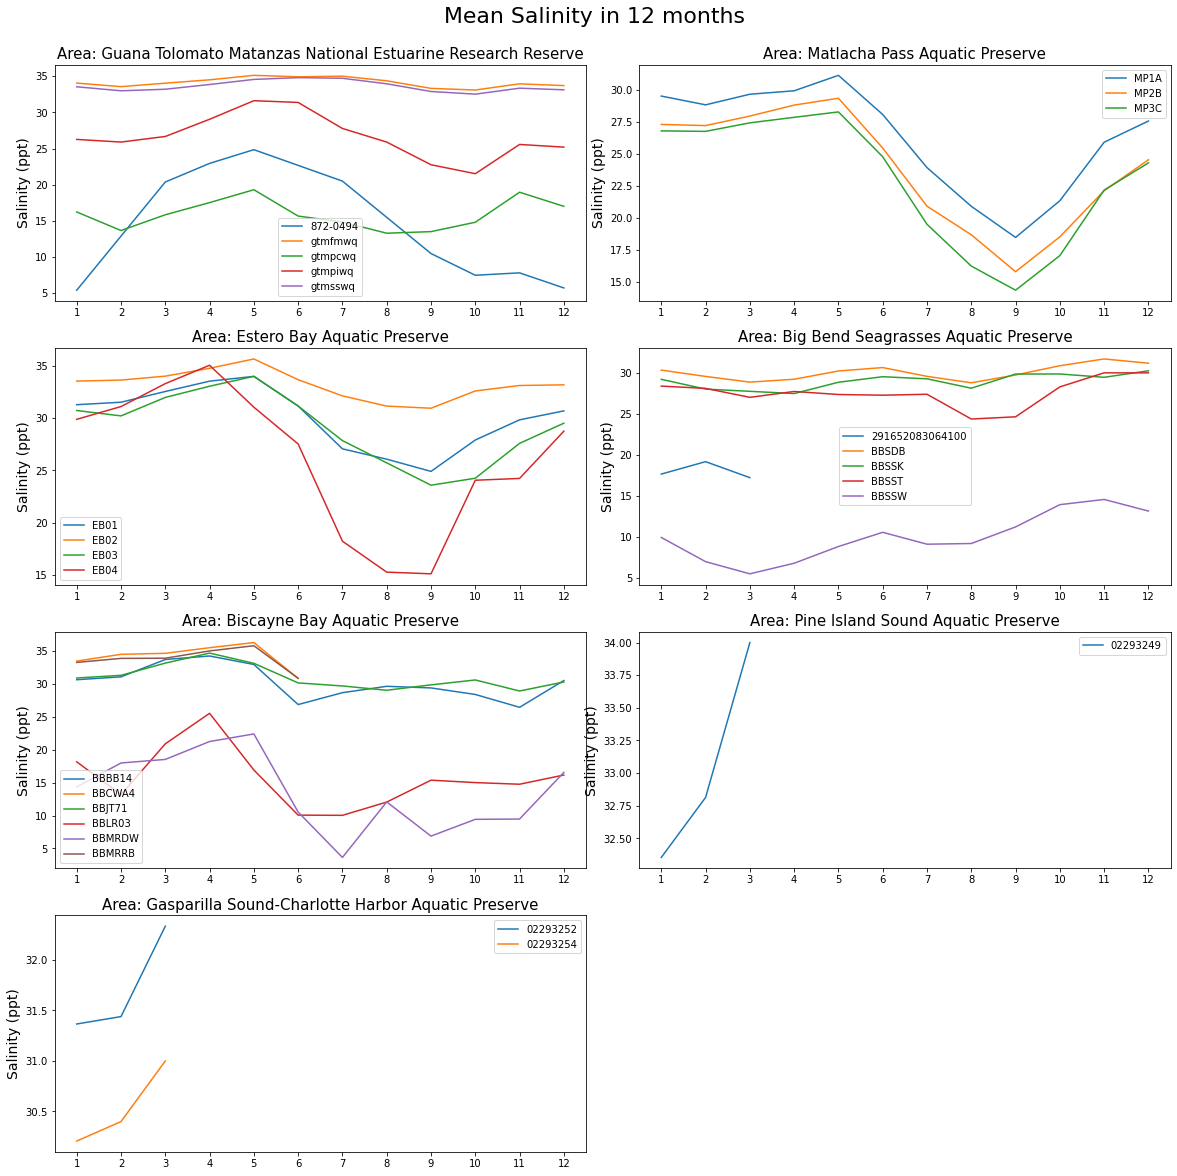

<Figure size 1440x1440 with 0 Axes>

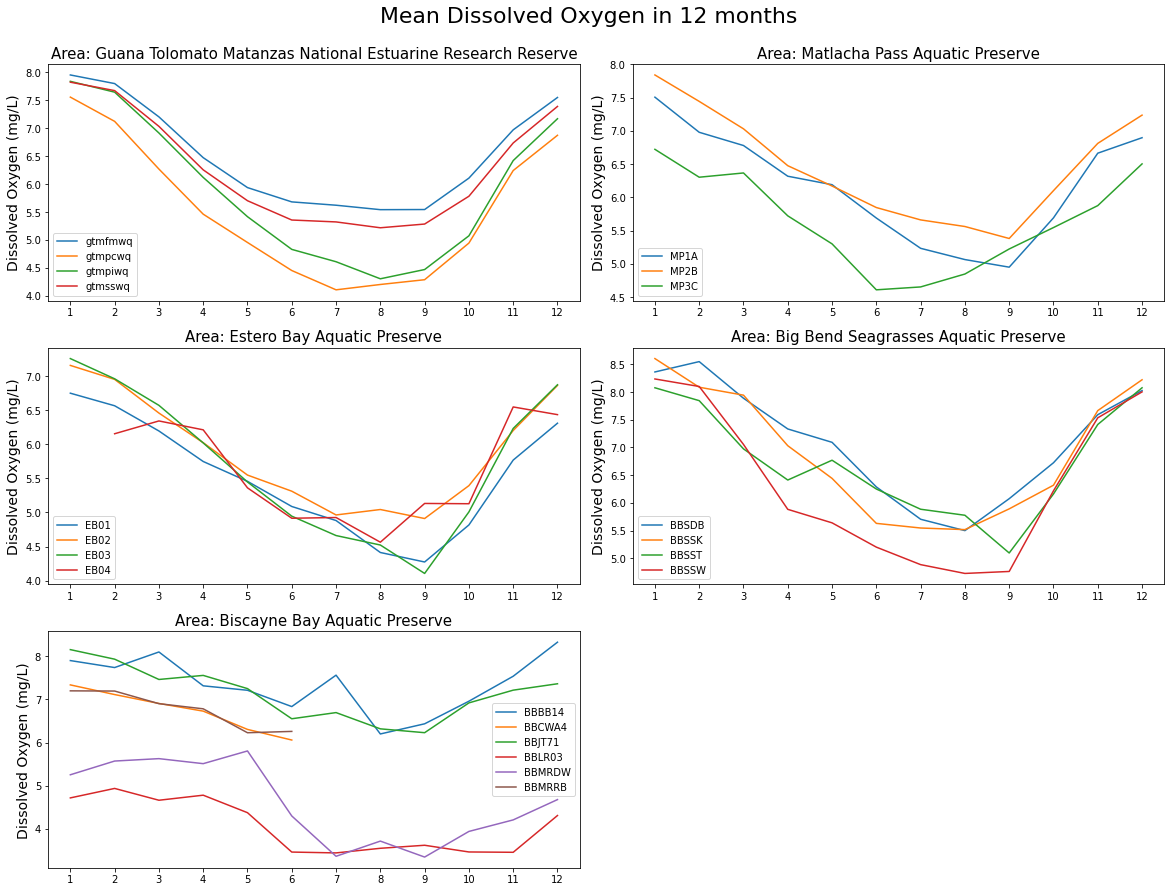

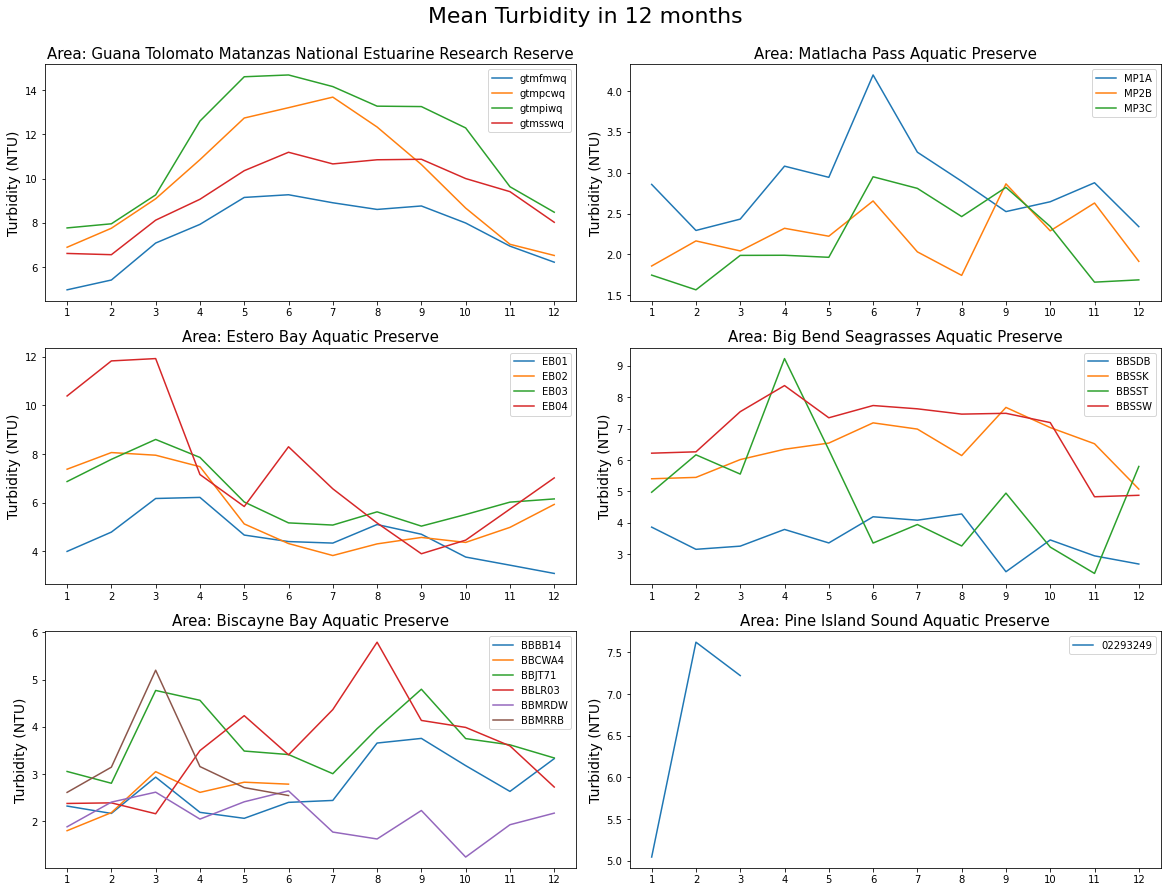

<Figure size 1440x1440 with 0 Axes>

In [38]:
plt.rcParams['figure.figsize'] = [20, 20]
df3 = df2.groupby(["Month","ManagedAreaName","ParameterName","ProgramLocationID"])["ResultValue"].agg([
    "count","max","min","mean","std"]).reset_index()
x_major_locator = plt.MultipleLocator(1)
r, c = math.ceil(len(listArea)/2),2 # rows and columns of subplots

for para in listPara:
    fig = plt.figure()
    i=0
    for area in listArea:
        plt.suptitle("Mean {} in 12 months".format(para), fontsize = 22, y = 0.92)
        dfNew = df3[(df3["ManagedAreaName"]==area)&(df3["ParameterName"]==para)]
        setList = dfNew.ProgramLocationID.unique()
        if len(setList) !=0:
            ax = fig.add_subplot(r,c,i+1)
            ax.set_title('Area: '+ area, size=15)
            i +=1
            j = 0
            for each in range(len(setList)):
                dfEachValue = dfNew[dfNew["ProgramLocationID"]==setList[each]]
                ax.plot(dfEachValue["Month"],dfEachValue["mean"],label=setList[each])
                ax.set_xlim(0.5,12.5)
                ax.legend(loc='best')
                ax.xaxis.set_major_locator(x_major_locator)
                plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)
                plt.ylabel("{} ({})".format(para,dictUnits[para]), size = 14)        
                ax.set_title('Area: '+ area, size=15)
                j = j+1